### 引入库
Week3的project中新增的库有：
+ sklearn:用于机器学习、数据处理的库
+ testCases:project给出的测试示例
+ planar_utils:提供例如绘制决策边界、导入平面数据等功能

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

np.random.seed(1)

### 加载数据

In [2]:
X,Y = load_planar_dataset()

利用matplotlib对二维平面数据 绘制散点图
numpy中的squeeze函数的功能：删除向量中的单维度。即Y原来是(1,m)行向量，调用squeeze后变化为(,m)这样rank=1的向量。
目的是前者可能造成调用matplotlib模块绘制函数时出错或不显示的情况。

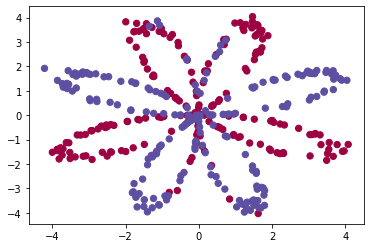

In [4]:
plt.scatter(X[0,:],X[1,:],c=np.squeeze(Y),s=40,cmap=plt.cm.Spectral)

In [5]:
# 检查原始数据维度
print("X dimension:"+str(X.shape))
print("Y dimension:"+str(Y.shape))


X dimension:(2, 400)
Y dimension:(1, 400)


### 利用Logistic Regression进行二分类

In [6]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

D:\Tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of Logistic Regression:0.47


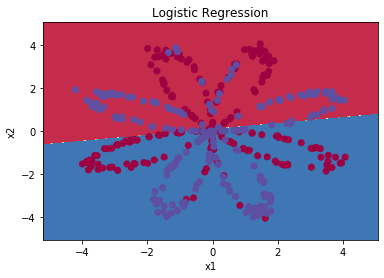

In [9]:
# plot decision boundary
plot_decision_boundary(lambda x:clf.predict(x),X,np.squeeze(Y))
plt.title("Logistic Regression")
# predict 
LR_predictions = clf.predict(X.T)
# Accuracy
LR_acc = float((np.dot(Y,LR_predictions)+np.dot(1-Y,1-LR_predictions))/Y.shape[1])
print("Accuracy of Logistic Regression:"+str(LR_acc))

### 确定NN的结构

In [10]:
def layer_sizes(X,Y):
    """
    返回参数：
        n_x:输入层的单元数
        n_h:隐藏层的单元数
        n_y:输出层的单元数
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return n_x,n_h,n_y

利用testCase中的数据进行测试：

In [11]:
print("======================Test Layer Size=================")
X_case,Y_case = layer_sizes_test_case()
n_x,n_h,n_y = layer_sizes(X_case,Y_case)
print("#Input layer cell: "+str(n_x))
print("#Hidden layer cell: "+str(n_h))
print("#Output layer cell: "+str(n_y))

======================Test Layer Size=================
#Input layer cell: 5
#Hidden layer cell: 4
#Output layer cell: 2


### 初始化参数

In [14]:
def init_params(n_x,n_h,n_y):
    """
    返回：
        W1,b1,W2,b2
        其中W1,W2不能全部初始化为0
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return params

对参数初始化函数进行测试

In [15]:
print("=========Test init_params==========")
n_x,n_h,n_y = initialize_parameters_test_case()
params = init_params(n_x,n_h,n_y)
print("W1:"+str(params["W1"]))
print("b1:"+str(params["b1"]))
print("W2:"+str(params["W2"]))
print("b2:"+str(params["b2"]))

=========Test init_params==========
W1:[[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1:[[0.]
 [0.]
 [0.]
 [0.]]
W2:[[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2:[[0.]]


### Forward Prop

In [18]:
def forward_propagation(X,params):
    """
    参数：
        params - W1,b1,W2,b2参数
    返回：
        A2:输出值
        cache:Z1,A1,Z2,A2这些bp算法中需要的中间参数
    """
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    cache={
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2,cache

测试Forward Prop

In [20]:
print("======Test forward prop==========")
X_case,params = forward_propagation_test_case()
A2,cache = forward_propagation(X_case,params)
print(np.mean(cache["Z1"]),np.mean(cache["A1"]),np.mean(cache["Z2"]),np.mean(cache["A2"]))


======Test forward prop==========
-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431
